# Data Scientist Associate Practical Exam Submission


In [592]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Larger scale for plots in notebooks
sns.set_context('notebook')
sns.set_theme(style='ticks', palette='deep')

#default plotting params
plt.rcParams['figure.figsize'] = (8,6)

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Setting seed for entire notebook
SEED = 42
np.random.seed(SEED)


In [593]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## Task 1 | Data Cleaning and Validation

#### Dataset has 1500 rows and 8 columns.
- **owned**:
    - There were no missing values in the rows of this column. Converted datatype from *int* to a *bool*
    - Unique values of *(1,0)* as expected.

- **make_model**:
    - No missing values in this column. Column had 6 unique values as expected, converted from a *pandas object* to *category* datatype.

- **review_month**:
    - No missing values in this column. However, there were 332 unique values instead of the expected 12. Further probing revealed most of the entries had different formats but all included three letters for the month. *Regex* was used to extract those letters and the rest was discarded.
    - Total number of unique values totaled 12 as expected after this process. Converted to an *ordered category* datatype

- **web_browser**:
    - 150 missing values in this column were all replaced with `*unknown*` keyword. The remaining data had 6 unique values as expected.
    - Column has 7 unique values after cleaning. Converted to *category* datatype.

- **reviewer_age**:
    - 105 reviewers did not have an entry for their age. The *mean* age of **33** years computed from the rest of the dataset was used in place of these missing values.
    - The rest of the values were converted from a *pandas object* to an *int* datatype.
    - From the 1500 entries, only 35 unique values were observed. This could be an indication that most of the reviewers can be categorized using age groups.

- **primary_use**:
    - Has no missing values.
    - Two unique values observed as expected. Converted to a *category* datatype.

- **value_for_money**:
    - No missing values
    - 10 unique values as expected. Converted column to a *category* datatype.

- **overall_rating**:
    - No missing values.
    - All values lie in expected range (0 - 25).

#### Dataset has 1500 rows and 8 columns after the cleaning process. 
- No rows or columns were dropped.
- Memory usage for cleaned dataframe dropped from 94KB to 23KB

In [594]:
moped_reviews = pd.read_csv('dataset/electric_bike_ratings_2212.csv')
moped_reviews.shape
moped_reviews.info()

(1500, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


In [595]:
moped_reviews.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [596]:
moped_reviews_cleaned = moped_reviews.copy()

In [597]:
moped_reviews['owned'].unique()
moped_reviews_cleaned['owned'] = moped_reviews_cleaned['owned'].astype(bool)
moped_reviews_cleaned['owned'].unique()


array([1, 0], dtype=int64)

array([ True, False])

In [598]:
moped_reviews['make_model'].unique()
moped_reviews_cleaned['make_model'] = moped_reviews_cleaned['make_model'].astype('category')


array(['Nielah-Eyden', 'Nielah-Keetra', 'Lunna-Keetra', 'Hoang-Keetra',
       'Lunna-Eyden', 'Hoang-Eyden'], dtype=object)

In [599]:
moped_reviews['review_month'].nunique()
moped_reviews['review_month'].isna().sum()

tes = moped_reviews['review_month'].str.findall(r'[A-Za-z]+').apply(lambda x: ''.join(x))
tes.unique()

month_cat = ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
moped_reviews_cleaned['review_month'] = (moped_reviews_cleaned['review_month']
                                         .str.findall(r'[A-Za-z]+')
                                         .apply(lambda x: ''.join(x))
                                         .astype('category')
                                         .cat.set_categories(month_cat, ordered=True))
moped_reviews_cleaned['review_month'].unique()



332

0

array(['Oct', 'Jun', 'Nov', 'Sep', 'Aug', 'Mar', 'Jul', 'Apr', 'Dec',
       'Feb', 'Jan', 'May'], dtype=object)

['Oct', 'Jun', 'Nov', 'Sep', 'Aug', ..., 'Apr', 'Dec', 'Feb', 'Jan', 'May']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [600]:
moped_reviews['web_browser'].isna().sum()
moped_reviews['web_browser'].nunique()
moped_reviews_cleaned['web_browser'] = moped_reviews_cleaned['web_browser'].fillna('unknown').astype('category')
moped_reviews_cleaned['web_browser'].unique()
moped_reviews_cleaned['web_browser'].isna().sum()


150

6

['Chrome', 'unknown', 'IE', 'Firefox', 'Safari', 'Android', 'Opera']
Categories (7, object): ['Android', 'Chrome', 'Firefox', 'IE', 'Opera', 'Safari', 'unknown']

0

In [601]:
mean_age = moped_reviews[moped_reviews['reviewer_age'] != '-']['reviewer_age'].astype('int').mean().round()

moped_reviews_cleaned['reviewer_age'] = (moped_reviews_cleaned['reviewer_age']
                                         .replace(value=mean_age,to_replace='-')
                                         .astype(np.int8))

len(moped_reviews[moped_reviews['reviewer_age'] == '-'])
moped_reviews_cleaned['reviewer_age'].unique()
moped_reviews_cleaned['reviewer_age'].nunique()


105

array([23, 24, 28, 41, 33, 47, 20, 32, 35, 22, 29, 39, 42, 36, 40, 27, 48,
       34, 16, 21, 25, 30, 46, 37, 31, 17, 44, 26, 38, 49, 50, 45, 19, 43,
       18], dtype=int8)

35

In [602]:
moped_reviews['primary_use'].unique()
moped_reviews_cleaned['primary_use'] = moped_reviews_cleaned['primary_use'].astype('category')


array(['Commuting', 'Leisure'], dtype=object)

In [603]:
moped_reviews_cleaned['value_for_money'] = moped_reviews_cleaned['value_for_money'].str.split('/',expand=True)[0].astype(np.int8)

moped_reviews_cleaned['value_for_money'].unique()


array([ 5,  4,  3,  7,  6,  2,  9,  8, 10,  1], dtype=int8)

In [604]:
moped_reviews['overall_rating'].describe()
moped_reviews['overall_rating'].isna().sum()

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

0

In [605]:
moped_reviews_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   owned            1500 non-null   bool    
 1   make_model       1500 non-null   category
 2   review_month     1500 non-null   category
 3   web_browser      1500 non-null   category
 4   reviewer_age     1500 non-null   int8    
 5   primary_use      1500 non-null   category
 6   value_for_money  1500 non-null   int8    
 7   overall_rating   1500 non-null   float64 
dtypes: bool(1), category(4), float64(1), int8(2)
memory usage: 23.2 KB


# Exploratory Data Analysis


### Owners and Reviews

In [606]:
moped_reviews_cleaned.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,True,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,False,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,False,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,True,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,True,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29


In [607]:
class ChartNum():
    def __init__(self) -> None:
        self.number = 0
    
    def add_one(self):
        self.number +=1
        return f'Figure {self.number}:'
    
chart_num = ChartNum()

True     0.593333
False    0.406667
Name: owned, dtype: float64

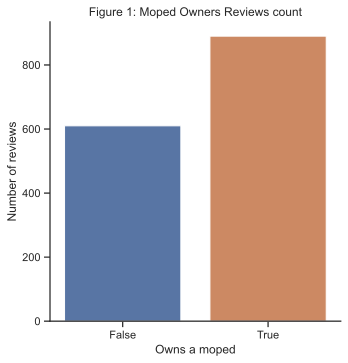

In [608]:
(sns.catplot(data=moped_reviews_cleaned, x='owned', kind='count')
 .set(title=f'{chart_num.add_one()} Moped Owners Reviews count', 
      xlabel='Owns a moped', 
      ylabel='Number of reviews'))

moped_reviews_cleaned['owned'].value_counts(normalize=True)
plt.show()


As seen in Figure 1, there are about 280 more reviewers who own a moped than reviewers who do not. These reviewers make up 59% of the dataset.

### Distribution of **overall rating**


[Text(0.5, 1.0, 'Figure 2: (A) Distribution of Overall Rating'),
 Text(0.5, 0, '')]

[Text(0.5, 1.0, '(B)'),
 Text(0.5, 0, 'Overall Rating'),
 Text(0, 0.5, 'Number of ratings recorded')]

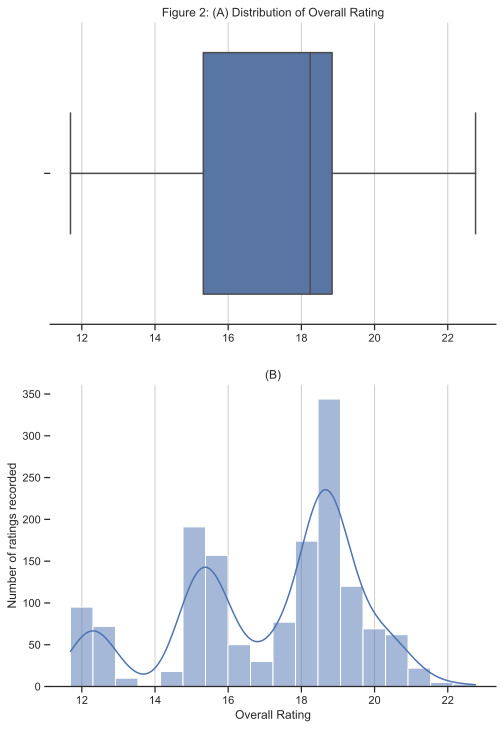

In [609]:
fig, ax = plt.subplots(2,1,figsize=(8,12))
(sns.boxplot(x = moped_reviews_cleaned['overall_rating'], showfliers=True, ax=ax[0])
 .set(
    title=f'{chart_num.add_one()} (A) Distribution of Overall Rating', 
    xlabel=''
    )
)

(sns.histplot(x = moped_reviews_cleaned['overall_rating'],kde=True, ax=ax[1])
 .set(
    title='(B)', 
    xlabel='Overall Rating',
    ylabel='Number of ratings recorded'
    )
)
ax[0].xaxis.grid()
ax[1].xaxis.grid()
sns.despine(left=True)

Figure 2 (A,B) shows the distribution of **overall rating** across the dataset. 2A (a boxplot) shows the median value to be just of 18 with the dataset having an inter-quartile range between 15.5 and 19. 2B, however, shows us a multimodal distribution of the values with a slight skew to the left.

### Relationship between moped owners and overall rating

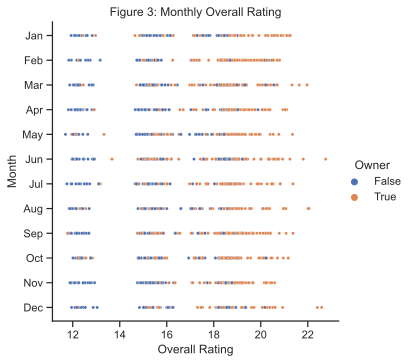

In [610]:
ax=sns.relplot(data=moped_reviews_cleaned, y='review_month', x='overall_rating', hue='owned', s=10,)
ax.set(
    title=f'{chart_num.add_one()} Monthly Overall Rating',
    ylabel='Month',
    xlabel='Overall Rating'
)
sns.move_legend(ax,'center right',title='Owner')


# plt.show()

From Figure 3 we are able to see distinction between owners and non-owners. The chart shows that most owners tend to rate the motorcycles higher than users who do not own any of the bikes.

Figure 4 paints a much clearer picture, however. Hoang-Eyden, the company's highest rated bike had an overwhelming number of its ratings coming from owners. Other models showed a more nuanced split with some models even having an equal median rating from owners and non-owners alike.

The general trend, however, shows that owners tend to give the mootorcycles a higher rating when compared to non-owners.

Referring back to Figure 1, the observed trend could also be due to the fact that there were more moped owners who took part in the survey.

[Text(0.5, 1.0, 'Figure 4: Overall Rating of Moped Models'),
 Text(0.5, 0, 'Overall Rating'),
 Text(0, 0.5, '')]

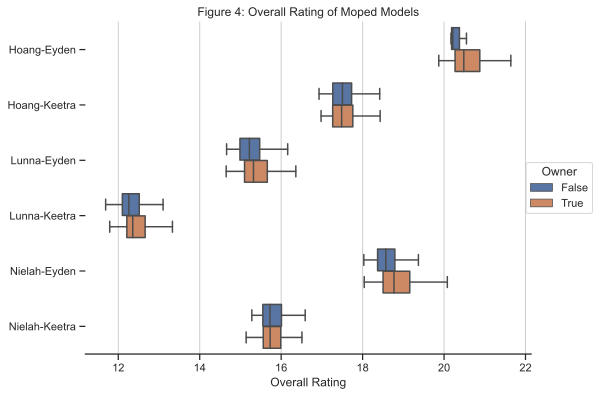

In [611]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(data=moped_reviews_cleaned, y='make_model', x='overall_rating',hue='owned', showfliers=False)
sns.move_legend(ax,'center right',title='Owner',bbox_to_anchor=(1.15,0.5))

ax.set(
    title=f'{chart_num.add_one()} Overall Rating of Moped Models',
    xlabel='Overall Rating', 
    ylabel=''
    )

ax.xaxis.grid()
sns.despine(left=True)

## Model Development
As the business is looking to predict one of two outcomes, this is a binary classification problem

The categorical variables are replaced with dummies for the machine learning model.

In [612]:
# data prep for ML model
moped_reviews_cleaned_ml = pd.get_dummies(moped_reviews_cleaned,columns=['make_model','review_month','web_browser','primary_use'], drop_first=True)
moped_reviews_cleaned_ml['owned'] = moped_reviews_cleaned_ml['owned'].astype(np.int8)
moped_reviews_cleaned_ml.shape
# moped_reviews_cleaned_ml.info()

(1500, 27)

### Baseline model
The baseline model selected for this problem is Logistic Regression. It is easy to setup and train and it also is one of the most efficient algorithms when used in situations like this where a clear distinction can be drawn between the desired outcomes.

In [613]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


In [614]:
# training sets
X = moped_reviews_cleaned_ml.drop('owned',axis=1).to_numpy()
y = moped_reviews_cleaned_ml['owned'].to_numpy()
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

((1500, 26), (1500,))

In [615]:
logit = LogisticRegression(max_iter=500)
logit.fit(X_train,y_train)
y_pred_log = logit.predict_proba(X_test)[:,1]

LogisticRegression(max_iter=500)

### Comparison model
The selected comparison model is the RandomForest Classifier. This was chosen because its ensemble learning technique gives it multiple bootstrap samples to work with which will minimize bias and in turn make the model more robust.

In [616]:
crf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
crf.fit(X_train,y_train)
y_pred_crf = crf.predict_proba(X_test)[:,1]

RandomForestClassifier(n_estimators=500, n_jobs=-1)

## Model Evaluation
For evaluation, **AUC** (area under the ROC curve) is used. This is because AUC is a good assessment of the classifier models selected and it can also be easily explained with the aid of visualization.

In [617]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

auc_log= np.round(roc_auc_score(y_test,y_pred_log),3)
auc_crf= np.round(roc_auc_score(y_test,y_pred_crf),3)

print(f'AUC for the baseline model is: {auc_log}')
print(f'AUC for the comparison model is: {auc_crf}')

AUC for the baseline model is: 0.815
AUC for the comparison model is: 0.768


### Model Evaluation Summary



In [618]:
from sklearn.metrics import roc_curve
fpr_log, tpr_log , _log = roc_curve(y_test, y_pred_log)
fpr_crf, tpr_crf , _crf = roc_curve(y_test, y_pred_crf)

<AxesSubplot: >

<AxesSubplot: >

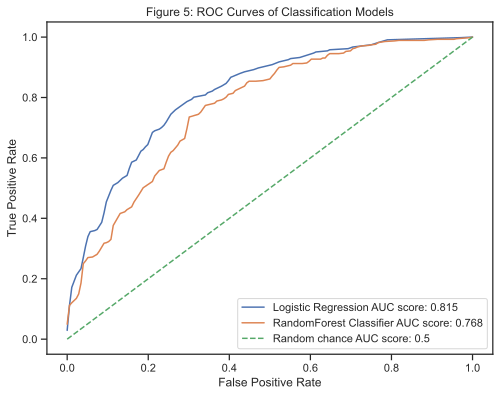

In [619]:
# fig, ax = plt.subplots()
ax = sns.lineplot(x=fpr_log,y=tpr_log, errorbar=None )
sns.lineplot(x=fpr_crf,y=tpr_crf,errorbar=None, ax=ax)
sns.lineplot(x=[0,1],y=[0,1], ax=ax, linestyle='dashed', errorbar=None)
ax.legend(labels=[f'Logistic Regression AUC score: {auc_log}',f'RandomForest Classifier AUC score: {auc_crf}','Random chance AUC score: 0.5'])
ax = ax.set(title=f'{chart_num.add_one()} ROC Curves of Classification Models', xlabel='False Positive Rate', ylabel='True Positive Rate')

## Conclusion
From Figure 5, we can see that the baseline model performs better than the comparison model. Test quality for both models are not the best but still good enough. Further steps can be taken to improve the predictive accuracy of our models. Hyperparameter tuning and cross validation should be the next steps.